In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [11]:
np.random.seed(999)

In [12]:
# Generate values for the white notice
samples = 1000
mean = 0
std = 1
w = np.random.normal(mean,std,size=samples)
w

array([ 1.27157844e-01,  1.40189088e+00,  3.14814987e-01, -8.58449164e-01,
       -2.66134437e-01, -6.48900710e-01,  1.56626757e+00, -2.09137019e+00,
        1.45632806e+00,  9.45293415e-01, -4.00201194e-01,  3.15227304e-01,
       -1.11006083e+00, -5.84821525e-01, -1.88409564e-01,  8.13023649e-01,
       -1.61304716e-01,  1.60087155e+00,  9.84342575e-01, -8.35447373e-01,
       -1.86649340e-01, -8.58067074e-01, -7.59778159e-01, -1.51205424e+00,
        1.74777474e+00,  2.13005498e+00,  7.11542235e-02, -1.84164224e+00,
       -3.52590698e-01, -4.08903795e-01,  5.59310171e-01,  4.74013097e-01,
       -1.70263337e+00, -1.30828655e+00,  4.24831738e-01,  6.66868345e-03,
       -4.70683277e-01,  4.80522162e-01,  1.06618630e+00,  1.15631841e+00,
       -2.40975167e-03,  6.92448453e-02,  8.47024068e-01,  6.61684352e-01,
       -7.08233760e-01, -4.98605435e-01,  6.04875725e-01,  3.00543132e-01,
       -2.51228669e-01,  5.56110081e-01,  5.54605922e-01,  9.96300274e-02,
       -7.87672409e-01,  

In [13]:
x = np.zeros(1000)
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [14]:
# simulate auto-regressive model of AR(2)
# this is the generator process
for t in range(3,1000):
    # two observation in the past
    # x(t) = a1*x[t-1]+a2*x[t-2]+w[t-1]
    x[t] = 0.6 * x[t-1]-0.4*x[t-2]+w[t-1]

In [9]:
x

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.14814987e-01,
       -6.69560172e-01, -7.93796535e-01, -8.57354562e-01,  1.36937345e+00,
       -9.26804298e-01,  3.52496106e-01,  1.52751280e+00,  3.75308043e-01,
       -7.05929897e-02, -1.30253985e+00, -1.33810824e+00, -4.70258568e-01,
        1.06611180e+00,  6.66465792e-01,  1.57430631e+00,  1.66234004e+00,
       -4.67765870e-01, -1.13224488e+00, -1.35030765e+00, -1.11706480e+00,
       -1.64217006e+00,  1.20929863e+00,  3.51250218e+00,  1.69493608e+00,
       -2.22968147e+00, -2.36837401e+00, -9.38055614e-01,  9.43826406e-01,
        1.41553119e+00, -1.23084522e+00, -2.61300615e+00, -6.50633866e-01,
        6.61490825e-01,  1.86464764e-01,  3.27804691e-01,  1.18828321e+00,
        1.73816646e+00,  5.65176842e-01, -2.86915635e-01,  4.48803950e-01,
        1.04573298e+00, -2.60315555e-01, -1.07308796e+00,  6.51491720e-02,
        7.68867818e-01,  1.84032354e-01,  3.58982365e-01,  6.96382400e-01,
        3.73866521e-01, -

In [19]:
x_df = pd.DataFrame(x)

In [20]:
x_df.head()

,0
0,0.000000
1,0.000000
2,0.000000
3,0.314815
4,-0.669560


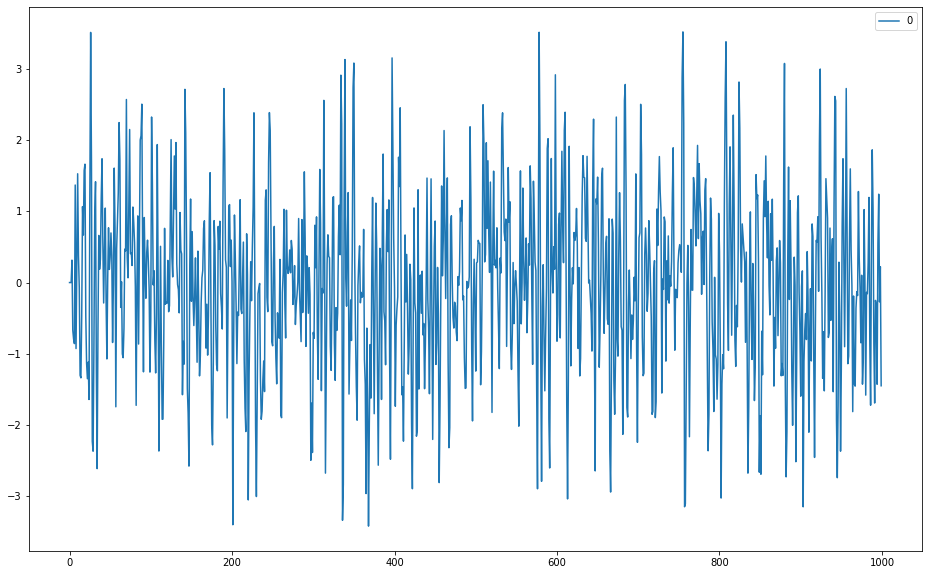

In [22]:
x_df.plot(figsize=(16,10));

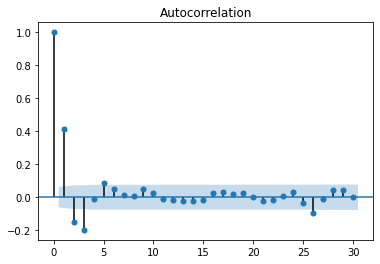

In [26]:
plot_acf(x_df);

In [39]:
# this is not a stationary process !
# Autoregressive is not always station

# ---> https://www.statsmodels.org/stable/examples/notebooks/generated/autoregressions.html


arma_mod3 = AutoReg(x,3)
res = arma_mod3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     AutoReg(3)   Log Likelihood               -1444.790
Method:               Conditional MLE   S.D. of innovations              1.031
Date:                Thu, 05 Jan 2023   AIC                              0.070
Time:                        20:40:19   BIC                              0.095
Sample:                             3   HQIC                             0.080
                                 1000                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0190      0.033     -0.582      0.560      -0.083       0.045
y.L1           0.5936      0.032     18.758      0.000       0.532       0.656
y.L2          -0.4205      0.034    -12.251      0.000      -0.488      -0.353
y.L3           0.0638      0.032      2.014      0.044       0.002       0.126
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5926           -1.5961j            1.7025           -0.1934
AR.2            0.5926           +1.5961j            1.7025            0.1934
AR.3            5.4116           -0.0000j            5.4116           -0.0000
-----------------------------------------------------------------------------
"""

In [41]:
res_hc0 = arma_mod3.fit(cov_type='HC0')
res_hc0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     AutoReg(3)   Log Likelihood               -1444.790
Method:               Conditional MLE   S.D. of innovations              1.031
Date:                Thu, 05 Jan 2023   AIC                              0.070
Time:                        20:41:17   BIC                              0.095
Sample:                             3   HQIC                             0.080
                                 1000                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0190      0.033     -0.582      0.561      -0.083       0.045
y.L1           0.5936      0.032     18.653      0.000       0.531       0.656
y.L2          -0.4205      0.036    -11.567      0.000      -0.492      -0.349
y.L3           0.0638      0.033      1.946      0.052      -0.000       0.128
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5926           -1.5961j            1.7025           -0.1934
AR.2            0.5926           +1.5961j            1.7025            0.1934
AR.3            5.4116           -0.0000j            5.4116           -0.0000
-----------------------------------------------------------------------------
"""

In [42]:
### Ready to review
xlf_df =pd.read_csv("./data/XLF.csv", index_col='Date', parse_dates=True)
xlf_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-05,28.480000,28.480000,28.230000,28.410000,25.635395,37989500
2018-01-08,28.379999,28.430000,28.270000,28.370001,25.599300,44252100
2018-01-09,28.490000,28.740000,28.440001,28.590000,25.797815,51418700
2018-01-10,28.680000,28.950001,28.629999,28.830000,26.014380,64670900
2018-01-11,28.950001,29.000000,28.809999,28.969999,26.140703,42361700


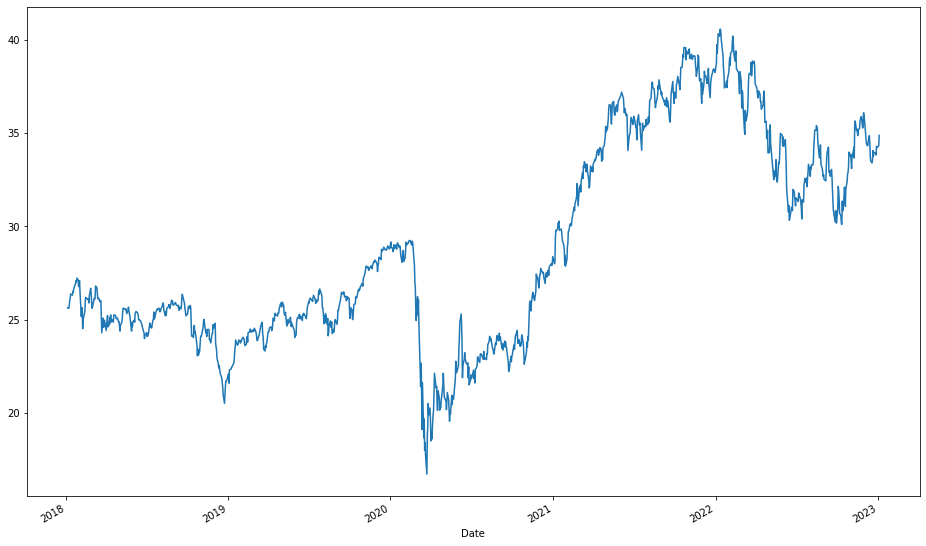

In [48]:
xlf_df['Adj Close'].plot(figsize=(16,10));

In [46]:
xlf_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,30.388816,30.634245,30.130596,30.384817,28.912792,5.795582e+07
std,5.135059,5.143403,5.113379,5.127382,5.528565,2.662208e+07
min,18.440001,18.600000,17.490000,17.660000,16.708448,1.126650e+07
25%,26.772500,26.952500,26.530001,26.765000,24.612579,4.064802e+07
50%,28.814999,29.000000,28.620001,28.785001,26.641649,5.153980e+07
75%,34.669998,34.910000,34.445001,34.634999,34.004489,6.780055e+07
max,41.500000,41.700001,41.220001,41.419998,40.570644,2.565250e+08


In [47]:
xlf_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2018-01-05 to 2023-01-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [55]:
# calculate the log daily return
# https://stackoverflow.com/questions/31287552/logarithmic-returns-in-pandas-dataframe
xlf_df['Log Adj Close'] = np.log(xlf_df['Adj Close']) - np.log(xlf_df['Adj Close'].shift(1))

In [68]:
xlf_df['Log Adj Close'].dropna(inplace=True)

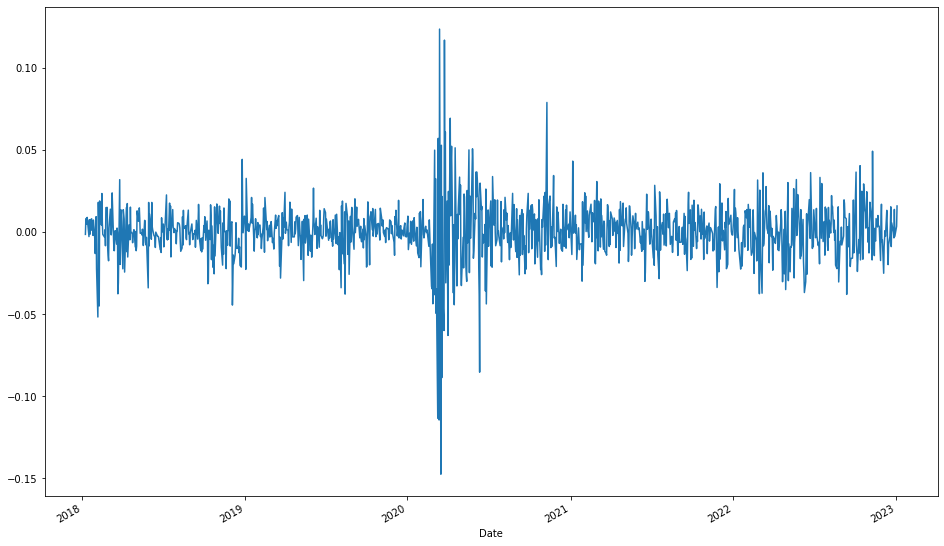

In [69]:
xlf_df['Log Adj Close'].plot(figsize=(16,10));

In [70]:
xlf_df.head()

,Open,High,Low,Close,Adj Close,Volume,Log Adj Close
Date,,,,,,,
2018-01-05,28.480000,28.480000,28.230000,28.410000,25.635395,37989500,NaN
2018-01-08,28.379999,28.430000,28.270000,28.370001,25.599300,44252100,-0.001409
2018-01-09,28.490000,28.740000,28.440001,28.590000,25.797815,51418700,0.007725
2018-01-10,28.680000,28.950001,28.629999,28.830000,26.014380,64670900,0.008360
2018-01-11,28.950001,29.000000,28.809999,28.969999,26.140703,42361700,0.004844


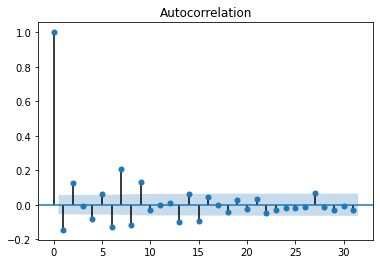

In [71]:
# !!! Remember to drop na!!
plot_acf(xlf_df['Log Adj Close']);

In [72]:
def adf_check(time_series):
    result = adfuller(time_series)
    print("Augmented Dicky-Fuller Test")
    labels= ['ADF Test Statistic', 'p-Value', '# of lags','Num of Observations']
    
    for value, label in zip(result, labels):
        print(label + " : " + str(value))
    if result[1] <= 0.05:
        print("strong evidence against null hypothesis (rejected)")
        print("Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis (accepted or fail to reject)")
        print("Data does have a unit root and is not stationary")

In [73]:
adf_check(xlf_df['Log Adj Close'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -10.642638798458329
p-Value : 4.885301886433638e-19
# of lags : 8
Num of Observations : 1248
strong evidence against null hypothesis (rejected)
Data has no unit root and is stationary


In [78]:

arma_order_10 = AutoReg(xlf_df['Log Adj Close'].dropna(),10)
res = arma_order_10.fit()
res.summary()

/Users/dennismacpro/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:          Log Adj Close   No. Observations:                 1257
Model:                    AutoReg(10)   Log Likelihood                3364.283
Method:               Conditional MLE   S.D. of innovations              0.016
Date:                Thu, 05 Jan 2023   AIC                             -8.214
Time:                        20:58:34   BIC                             -8.165
Sample:                            10   HQIC                            -8.196
                                 1257                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept             0.0002      0.000      0.427      0.669      -0.001       0.001
Log Adj Close.L1     -0.0898      0.028     -3.169      0.002      -0.145      -0.034
Log Adj Close.L2      0.0858      0.028      3.027      0.002       0.030       0.141
Log Adj Close.L3      0.0301      0.028      1.059      0.289      -0.026       0.086
Log Adj Close.L4     -0.0866      0.028     -3.087      0.002      -0.142      -0.032
Log Adj Close.L5      0.0136      0.028      0.484      0.628      -0.041       0.069
Log Adj Close.L6     -0.0761      0.028     -2.710      0.007      -0.131      -0.021
Log Adj Close.L7      0.1609      0.028      5.735      0.000       0.106       0.216
Log Adj Close.L8     -0.0506      0.028     -1.779      0.075      -0.106       0.005
Log Adj Close.L9      0.0812      0.028      2.865      0.004       0.026       0.137
Log Adj Close.L10    -0.0160      0.028     -0.565      0.572      -0.072       0.040
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0248           -0.4630j            1.1245           -0.4325
AR.2            -1.0248           +0.4630j            1.1245            0.4325
AR.3            -0.5692           -1.2230j            1.3490           -0.3193
AR.4            -0.5692           +1.2230j            1.3490            0.3193
AR.5             1.3400           -0.0000j            1.3400           -0.0000
AR.6             0.9332           -0.9060j            1.3007           -0.1226
AR.7             0.9332           +0.9060j            1.3007            0.1226
AR.8             0.1235           -1.5733j            1.5781           -0.2375
AR.9             0.1235           +1.5733j            1.5781            0.2375
AR.10            4.8089           -0.0000j            4.8089           -0.0000
------------------------------------------------------------------------------
"""

In [80]:
xlf_df['Second Log Adj Close'] = xlf_df['Log Adj Close'] - xlf_df['Log Adj Close'].shift(1)

In [81]:
xlf_df['Second Log Adj Close'].dropna(inplace=True)

In [82]:
adf_check(xlf_df['Second Log Adj Close'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -13.428982670469676
p-Value : 4.048814849725987e-25
# of lags : 19
Num of Observations : 1236
strong evidence against null hypothesis (rejected)
Data has no unit root and is stationary


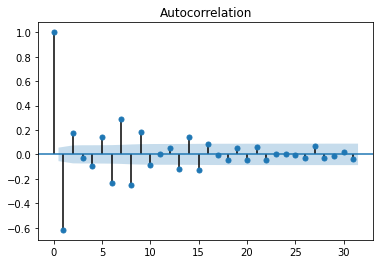

In [84]:
plot_acf(xlf_df['Second Log Adj Close']);

In [85]:

arma_order_10 = AutoReg(xlf_df['Second Log Adj Close'],10)
res = arma_order_10.fit()
res.summary()

/Users/dennismacpro/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             AutoReg Model Results                              
================================================================================
Dep. Variable:     Second Log Adj Close   No. Observations:                 1256
Model:                      AutoReg(10)   Log Likelihood                3314.273
Method:                 Conditional MLE   S.D. of innovations              0.017
Date:                  Thu, 05 Jan 2023   AIC                             -8.138
Time:                          21:01:18   BIC                             -8.089
Sample:                              10   HQIC                            -8.120
                                   1256                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept                 9.713e-07      0.000      0.002      0.998      -0.001       0.001
Second Log Adj Close.L1     -1.0105      0.028    -35.801      0.000      -1.066      -0.955
Second Log Adj Close.L2     -0.8407      0.040    -21.042      0.000      -0.919      -0.762
Second Log Adj Close.L3     -0.7257      0.046    -15.913      0.000      -0.815      -0.636
Second Log Adj Close.L4     -0.7359      0.049    -15.007      0.000      -0.832      -0.640
Second Log Adj Close.L5     -0.6239      0.050    -12.377      0.000      -0.723      -0.525
Second Log Adj Close.L6     -0.6097      0.050    -12.095      0.000      -0.708      -0.511
Second Log Adj Close.L7     -0.3504      0.049     -7.145      0.000      -0.446      -0.254
Second Log Adj Close.L8     -0.3233      0.046     -7.089      0.000      -0.413      -0.234
Second Log Adj Close.L9     -0.1587      0.040     -3.972      0.000      -0.237      -0.080
Second Log Adj Close.L10    -0.0892      0.028     -3.157      0.002      -0.145      -0.034
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9109           -0.7425j            1.1752           -0.1088
AR.2             0.9109           +0.7425j            1.1752            0.1088
AR.3            -1.0305           -0.4411j            1.1210           -0.4356
AR.4            -1.0305           +0.4411j            1.1210            0.4356
AR.5             0.4879           -1.2357j            1.3285           -0.1901
AR.6             0.4879           +1.2357j            1.3285            0.1901
AR.7            -0.9365           -1.1419j            1.4768           -0.3593
AR.8            -0.9365           +1.1419j            1.4768            0.3593
AR.9            -0.3221           -1.2551j            1.2957           -0.2900
AR.10           -0.3221           +1.2551j            1.2957            0.2900
------------------------------------------------------------------------------
"""